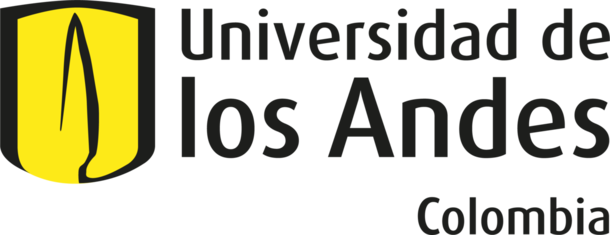

__ISIS3301 - Inteligencia de Negocios__

<div align="center">

## **Laboratorio 2: Regresión**
-------------------------------------

</div>


*   *Julián Castro - 202020847*
*   *Alejandro Gómez - 202015122*
*   *Jonathan Rivera -*


## Objetivos



* Construir modelos analíticos para estimar una variable objetivo continua a partir de un conjunto de variables observadas.


* Comprender el proceso para la construcción de modelos analíticos que responden a una tarea de regresión.


* Automatizar el proceso de construcción de modelos analíticos con el uso de pipelines de tal forma que puedan ser usados en ambientes de producción.


* Extraer información útil para el negocio a partir de los resultados de los modelos de regresión.

## Caso de Negocio: Predicción de muertes per capita de cáncer

La Organización Mundial de la Salud está piloteando un nuevo programa de financiamiento que busca intervenir en poblaciones con un alto número de fallecimientos debido al cáncer. El objetivo es permitirle a los gobiernos nacionales y locales invertir en programas de diagnóstico temprano, instalaciones de tratamiento, entrenamiento de personal hospitalario y financiamiento de la investigación en esta enfermedad. Debido a que este programa busca beneficiar al mediano y largo plazo poblaciones vulnerables, se ha determinado la necesidad de crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un alto número de muertes por cáncer aunque no haya registros completos u oficiales.

Para ello y de la mano del gobierno norteamericano, la OMS ha recopilado datos de Estados Unidos para la creación del modelo a partir de diversas características demográficas y del estado de los servicios de salud de una población para determinar el número de muertes por cáncer por cada 100.000 habitantes. El objetivo, es que este modelo permita tomar decisiones de la asignación de finaciamiento del nuevo programa, además de determinar qué datos son relevantes y cuáles no lo son para la estimación y la recolección de información.

-----------------------------------------------

La OMS desea que usted los apoye en la construcción del modelo de regresión previamente descrito utilizando algunas de las etapas de la metodología "ASUM-DM":




__1. Entendimiento de los datos:__ Describir la característica más relevantes de los datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.


__2. Preparación de datos:__ Solucionar cualquier problema de calidad de datos previamente identificado. Además, debe aplicar cualquier proceso de preprocesamiento de datos necesario para la construcción del modelo de regresión.


__3. Modelado:__ Utilizando las variables previamente seleccionadas, construir un modelo de regresión que estime la variable objetivo con el menor error posible.


__4. Evaluación cuantitativa:__ A partir de las métricas seleccionadas para evaluar y seleccionar el mejor modelo, explicar el resultado obtenido desde el punto de vista cuantitativo. Contestar a la pregunta: ¿Su equipo recomienda utlizar en producción el modelo de estimación de precios de portátiles o es preferible continuar haciendo estimaciones de forma manual? En caso de no recomendar el uso del modelo, ¿qué recomendaciones haría para continuar iterando con el objetivo de la construcción de un mejor modelo?


__5. Evaluación cualitativa:__ Debe estar compuesta de dos partes:
- Validación de supuestos: Realizar los ajustes necesarios para que el modelo cumpla con los supuestos necesarios para la inferencia estadística con regresiones.
- Interpretación de los coeficientes: Realizar la interpretación de los coeficientes de la regresión, identificando las variables más relevantes para la estimación y como afectan la variable objetivo.


__6. Visualización de los resultados:__ Integrar el resultado obtenido con el modelo de regresión a un tablero de control para apoyar el objetivo de la empresa.


7. Exportar el mejor modelo (utilizando pipelines) para poder ser usado sobre datos nuevos en el ambiente de producción del cliente.


8. Generar predicciones sobre los datos de prueba que no se encuentran etiquetados utilizando el mejor modelo. Exportar las predicciones en formato CSV utlizando como base el mismo archivo de datos de prueba.

--------------------------------
# **1. Entendimiento de los datos**
--------------------------------

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 


In [11]:
# Se cargan los datos. 
df =pd.read_csv("./data/202410_Laboratorio 2 - Regresión_train_data.csv", sep=',', encoding = "ISO-8859-1")

In [12]:
# Tamaño del dataset: Filas y columnas
df.shape

(2132, 34)

In [13]:
# Se visualiza una muestra de los registros del dataset
df.sample(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
1605,305.0,120,442.5,49819,60338,15.7,464.052504,"(48021.6, 51046.4]",36.9,35.5,...,40.0,38.0,18.8,86.238824,1.649198,1.617386,5.635737,49.327065,4.138711,162.8
1332,32.0,12,462.9,39342,6753,29.9,0.000000,"(37413.8, 40362.7]",31.0,31.2,...,30.4,42.4,30.8,42.714160,0.000000,0.073594,0.647630,42.412281,9.492754,169.9
1081,494.0,189,455.9,45706,75522,13.5,39.723524,"(45201, 48021.6]",45.3,43.6,...,47.1,37.2,16.4,95.675894,2.640406,0.304110,0.411136,56.747358,5.627676,159.4
172,8857.0,3377,414.5,56877,2361026,17.1,57.178532,"(54545.6, 61494.5]",34.5,33.5,...,40.1,35.0,24.2,64.610414,6.265187,6.185118,17.456328,53.803745,5.475268,154.6
1719,212.0,95,416.9,50997,47733,11.1,0.000000,"(48021.6, 51046.4]",37.9,37.3,...,51.1,28.8,14.8,96.477096,0.479536,0.603626,0.929626,55.670957,6.541519,186.5


In [14]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2132 non-null   float64
 1   avgDeathsPerYear         2132 non-null   int64  
 2   incidenceRate            2132 non-null   float64
 3   medIncome                2132 non-null   int64  
 4   popEst2015               2132 non-null   int64  
 5   povertyPercent           2132 non-null   float64
 6   studyPerCap              2132 non-null   float64
 7   binnedInc                2132 non-null   object 
 8   MedianAge                2132 non-null   float64
 9   MedianAgeMale            2132 non-null   float64
 10  MedianAgeFemale          2132 non-null   float64
 11  Geography                2132 non-null   object 
 12  AvgHouseholdSize         2132 non-null   float64
 13  PercentMarried           2132 non-null   float64
 14  PctNoHS18_24            

In [15]:
# Resumen de los estadisticos de las variables numéricas
df.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,613.385785,183.537992,448.816467,47029.474203,1.025064e+05,16.889681,158.003002,44.298687,39.559475,42.140009,...,41.237899,36.305113,19.282786,83.686321,9.132512,1.260485,1.953356,51.228950,5.643918,179.000047
std,1435.393846,507.649052,53.582307,12107.930677,3.442282e+05,6.415614,533.636824,39.522898,5.208212,5.272267,...,9.326155,7.847326,6.136426,16.588379,14.613785,2.745672,3.484569,6.565620,1.980214,27.416156
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,23.500000,22.800000,22.800000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,77.000000,28.000000,421.600000,38875.750000,1.154725e+04,12.200000,0.000000,37.700000,36.300000,39.000000,...,34.600000,30.975000,14.900000,77.560360,0.614838,0.263542,0.278374,47.749949,4.520411,161.875000
50%,174.500000,62.000000,453.549422,45207.000000,2.693200e+04,15.900000,0.000000,40.900000,39.600000,42.300000,...,41.300000,36.400000,18.900000,90.122747,2.214754,0.538013,0.781727,51.595091,5.383877,178.550000
75%,515.250000,141.000000,481.600000,52376.250000,6.663525e+04,20.300000,79.275307,44.000000,42.600000,45.400000,...,47.600000,41.425000,23.200000,95.600016,10.709158,1.190457,2.171349,55.398869,6.478029,195.300000
max,38150.000000,14010.000000,1014.200000,125635.000000,1.017029e+07,47.400000,9439.200444,619.200000,64.700000,65.700000,...,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,37.859023,78.075397,21.326165,293.900000


--------------------------------
### **Análisis de completitud**
--------------------------------

In [16]:
# Cálculo de porcentaje de valores nulos por columna
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

PctSomeCol18_24            0.752345
PctPrivateCoverageAlone    0.200750
PctEmployed16_Over         0.053940
PctPublicCoverage          0.000000
PctBachDeg25_Over          0.000000
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctEmpPrivCoverage         0.000000
avgAnnCount                0.000000
PctHS25_Over               0.000000
PctWhite                   0.000000
PctBlack                   0.000000
PctAsian                   0.000000
PctOtherRace               0.000000
PctMarriedHouseholds       0.000000
BirthRate                  0.000000
PctPublicCoverageAlone     0.000000
PctBachDeg18_24            0.000000
avgDeathsPerYear           0.000000
PctHS18_24                 0.000000
PctNoHS18_24               0.000000
PercentMarried             0.000000
AvgHouseholdSize           0.000000
Geography                  0.000000
MedianAgeFemale            0.000000
MedianAgeMale              0.000000
MedianAge                  0.000000
binnedInc                  0

--------------------------------
### **Análisis de Unicidad**
--------------------------------

Se verifica si hay filas idénticas que representa duplicidad de los datos.

In [17]:
df.duplicated(keep = False).sum()

0

--------------------------------
### **Análisis de Consistencia**
--------------------------------

--------------------------------
### **Análisis de Validez**
--------------------------------

--------------------------------
# **2. Preparación de datos**
--------------------------------

In [ ]:
# Identificar las variables a utilizar en el modelo
cols_select = []


--------------------------------
# **3. Modelado**
--------------------------------

--------------------------------
# **4. Evaluación Cuantitativa**
--------------------------------

--------------------------------
# **1. Evaluación Cualitativa**
--------------------------------